<a href="https://colab.research.google.com/github/Aditya1BM22CS017/6A-ML-Lab-Batch2/blob/main/1BM22CS017_Lab_9_Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8327362063670796
Confusion Matrix:
[[7003  411]
 [1223 1132]]


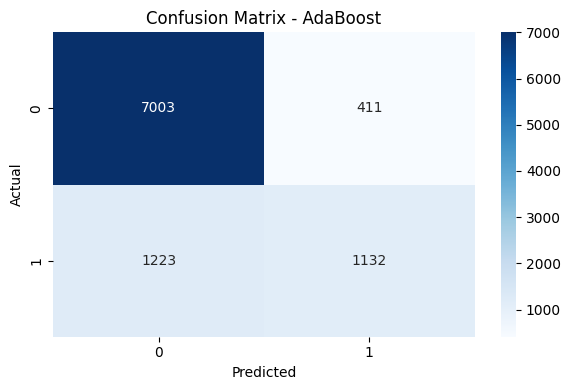

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
data = pd.read_csv('income.csv')

# Preprocess the data (placeholder)
# Example: data = pd.get_dummies(data)
# Make sure all features are numeric and handle any missing values.

# Split features and target
X = data.drop('income_level', axis=1)
y = data['income_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost classifier
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_boost.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ada_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=ada_boost.classes_, yticklabels=ada_boost.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')
plt.tight_layout()
plt.show()


                  Base  n_estimators  learning_rate  Accuracy
0         DecisionTree            10           0.01  0.633333
1         DecisionTree            10           0.10  0.966667
2         DecisionTree            10           1.00  1.000000
3         DecisionTree            50           0.01  0.633333
4         DecisionTree            50           0.10  1.000000
5         DecisionTree            50           1.00  0.933333
6         DecisionTree           100           0.01  0.966667
7         DecisionTree           100           0.10  1.000000
8         DecisionTree           100           1.00  0.933333
9   LogisticRegression            10           0.01  0.933333
10  LogisticRegression            10           0.10  1.000000
11  LogisticRegression            10           1.00  0.933333
12  LogisticRegression            50           0.01  1.000000
13  LogisticRegression            50           0.10  1.000000
14  LogisticRegression            50           1.00  0.933333
15  Logi

<ipython-input-4-897755f76214>:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='n_estimators', y='Accuracy', hue='Base', data=results_df, ci=None)


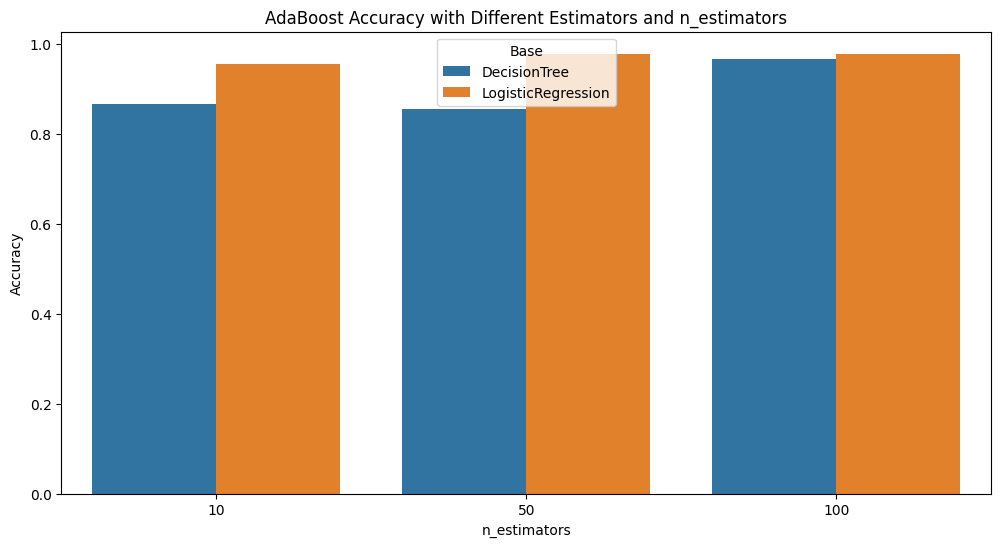

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Try different base classifiers and parameters ---
results = []

# Parameters to experiment with
n_estimators_list = [10, 50, 100]
learning_rates = [0.01, 0.1, 1]

# DecisionTreeClassifier as base estimator
for n in n_estimators_list:
    for lr in learning_rates:
        tree_base = DecisionTreeClassifier(max_depth=1)
        model = AdaBoostClassifier(estimator=tree_base, n_estimators=n, learning_rate=lr, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            'Base': 'DecisionTree',
            'n_estimators': n,
            'learning_rate': lr,
            'Accuracy': acc
        })

# LogisticRegression as base estimator
for n in n_estimators_list:
    for lr in learning_rates:
        log_reg_base = LogisticRegression(max_iter=1000)
        model = AdaBoostClassifier(estimator=log_reg_base, n_estimators=n, learning_rate=lr, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            'Base': 'LogisticRegression',
            'n_estimators': n,
            'learning_rate': lr,
            'Accuracy': acc
        })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Visualize the result
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='n_estimators', y='Accuracy', hue='Base', data=results_df, ci=None)
plt.title('AdaBoost Accuracy with Different Estimators and n_estimators')
plt.show()